In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec

import hdf5plugin
import h5py
import numpy as np

In [39]:
fil_data = h5py.File("/mnt/blpc2//datax/scratch/cgchoza/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_58810_21241_And_XIV_0058.gpuspec.0000.h5", mode="r")


In [40]:
pfb_shape = np.fromfile("../telescopes/gbt_pfb.f32", dtype=np.float32)


In [41]:
nfpc = 1048576

cc_ind = 0
cc_data = fil_data["data"][:,0,cc_ind*nfpc:(cc_ind+1)*nfpc]

In [42]:
# mid = nfpc//2
# cc_data[:,mid] = (cc_data[:,mid-1] + cc_data[:,mid+1])/2


In [43]:
cc_data.shape

(16, 1048576)

In [44]:
for k in fil_data["data"].attrs:
    print(k)

DIMENSION_LABELS
az_start
data_type
fch1
foff
machine_id
nbits
nchans
nifs
source_name
src_dej
src_raj
telescope_id
tsamp
tstart
za_start


/tmp/ipykernel_289581/2060632764.py:35: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


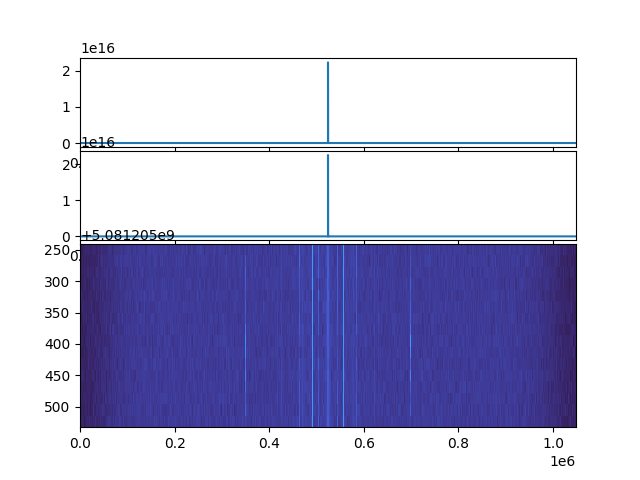

In [45]:
fch1 = fil_data["data"].attrs["fch1"]
foff = fil_data["data"].attrs["foff"]
# nchans = fil_data["data"].attrs["nchans"]
nchans = 1048576
# freqs = np.linspace(fch1, fch1 + foff * nchans, nchans)
freqs = np.linspace(0, nchans, nchans)

start_time = fil_data["data"].attrs["tstart"] * 24 * 60 * 60
end_time = start_time + fil_data["data"].attrs["tsamp"] * cc_data.shape[0]


# Create a gridspec instance with 10 rows
gs = gridspec.GridSpec(16, 1)

plt.figure()

# Assign different rows to your subplots
ax0 = plt.subplot(gs[:4, 0])  # Top plot gets 1 row (10% of the height)
ax1 = plt.subplot(gs[4:8, 0], sharex=ax0, sharey=ax0)  # Top plot gets 1 row (10% of the height)
ax2 = plt.subplot(gs[8:16, 0], sharex=ax0)  # Middle plot gets 4 rows (40% of the height)

# fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(10, 10))

# spec_min = np.nanmin(cc_data)
# spec_max = np.nanmax(cc_data) - 1

# plane_min = np.nanmin(cc_data) + 7
# plane_max = np.nanmax(cc_data) - 1

ax0.plot(freqs, cc_data.mean(0))
ax1.plot(freqs, cc_data.mean(0)/pfb_shape)
ax2.imshow(10*np.log10(cc_data), aspect="auto", interpolation="None", cmap="turbo", extent=[freqs[0], freqs[-1], end_time, start_time])


plt.tight_layout()


In [46]:
2.15e5

215000.0

In [47]:
220000

220000

In [48]:
compensated_data = cc_data/pfb_shape


In [61]:
arr = sigmaclip(compensated_data, 4, 4)


In [64]:
np.std(arr.clipped)


np.float32(14151717.0)

In [69]:
clipped_data = sigma_clip(compensated_data, 50, 4, 4)



In [70]:
np.std(clipped_data)

np.float64(14234479.056406103)

In [71]:

np.std(clipped_data,dtype=np.float32)


np.float64(14234479.056406103)